# AB-тестирование
## Задание 2.7


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* **Любую задачу, даже ее часть, можно выполнять как в Питоне, так и в R**.
* Задачи 3 и 4 необходимо оформить в latex/markdown и прислать `pdf` или же прислать фотку в правильной ориентации рукописного решения, где **все четко видно**.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Баллы за задание:**

* Задача 1 — 1 балл
* Задача 2 — 1 балл
* Задача 3 — 3 балла
* Задача 4 — 4 балла
* Задача 5 — 3 балла
* Задача 6 — 6 баллов

----


In [80]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
from tqdm import tqdm

%matplotlib inline

### Задача 1

Проверьте, отличается ли средний балл студентов 3 курса DS-потока за 5 и 6 практические задания осенью 2020. Не забывайте про визуализацию.

Сделайте выводы.

Построим гистограмму оценок студентов за 5 и 6 д/з.

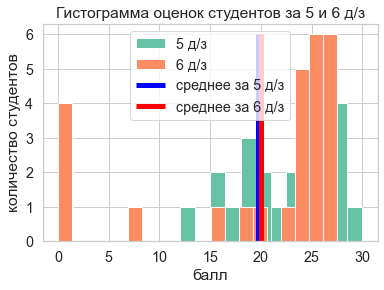

In [21]:
X_5 = np.array([28, 15, 26, 12, 23, 0, 25, 17, 23, 20, 25, 19, 18, 24, 15, 21, 24, 
                30, 0, 20, 27, 26, 27, 28, 0, 19])
X_6 = np.array([27.5, 25.5, 26, 0, 25, 0, 23.5, 18, 27.5, 23.5, 26, 8, 19.5, 23.5, 27.5, 24, 23, 
                24.5, 0, 25.5, 25.5, 26.5, 26.5, 27.5, 0, 16])

plt.hist(X_5, label='5 д/з', bins=20)
plt.vlines(x=np.mean(X_5), ymin=0, ymax=6, colors='blue', linewidth=5, label='среднее за 5 д/з')
plt.hist(X_6, label='6 д/з', bins=20)
plt.vlines(x=np.mean(X_6), ymin=0, ymax=6, colors='red', linewidth=5, label='среднее за 6 д/з')
plt.xlabel('балл')
plt.ylabel('количество студентов')
plt.title('Гистограмма оценок студентов за 5 и 6 д/з')
plt.legend()
plt.show()

Если смотреть на гистограмму, то можно сделать вывод, что средние очень сильно похожи, из чего можно сделать предварительный выаод, что средний балл студентов не отличается.

Кажется, выборки зависимы, но на всякий случай проверим, вдруг выборки независимы, и можно применить тест для независимых выборок.

In [23]:
pval = sps.pearsonr(X_5, X_6)[1]
print(f'p-value критерия о независимости выборок: {pval}')
print(f'отвергается ли гипотеза о независимости: {pval < 0.05}')

p-value критерия о независимости выборок: 4.0573101849351685e-08
отвергается ли гипотеза о независимости: True


Выборки зависимы, поэтому применим t-test для связных выборок.

In [26]:
ttest_pval = sps.ttest_rel(X_5, X_6)[1]
print(f'p-value критерия о равенстве средних оценок: {ttest_pval}')
print(f'отвергается ли гипотеза о равентсве: {ttest_pval < 0.05}')

p-value критерия о равенстве средних оценок: 0.761757160143346
отвергается ли гипотеза о равентсве: False


**Вывод:** гипотеза о равенстве средних оценок не отвергается, к тому же по гистограмме видно, что средние оценки очень близки, из чего можно сделать вывод, что средние действительно могут быть одинаковы.

### Задача 2
Рассмотрим таблицу с оценками за осенний семестр. Предполагая нормальность распределений, проверьте гипотезу о том, что средний балл `S1` по решению теоретических задач не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

Сначала посмотрим на боксплоты, чтобы сделать вывод относительно выбросов.

<AxesSubplot:>

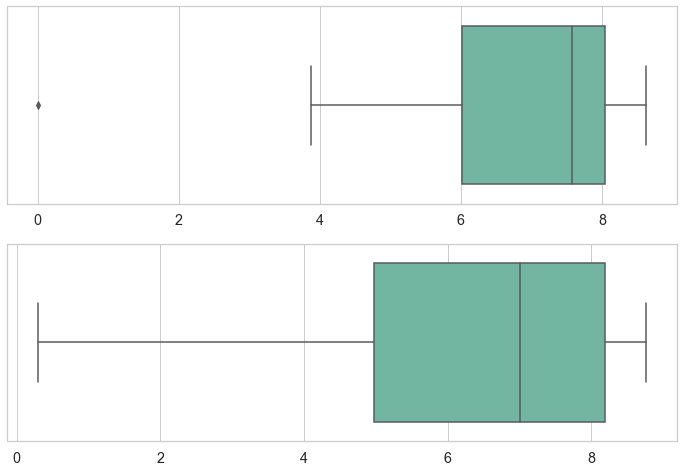

In [56]:
X_1 = np.array([8.04, 8.22, 5.76, 0, 6.52, 6.02, 8.63, 3.88, 7.77, 8.02, 7.57, 8.17, 7.05])
X_2 = np.array([6.18, 8.19, 6.84, 8.49, 4.01, 4.97, 7.69, 7.01, 0.29, 8.77, 8.48, 7.95, 4.34])

fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.boxplot(X_1)
plt.subplot(2, 1, 2)
sns.boxplot(X_2)

В первой выборке очевидный выброс оценка 0 (на самом деле, мы знаем, что человек не был на DS-потоке, значит, действительно, это выброс). Еще очень сильно смущает длинный левый хвост второй выборки, поэтому на всякий случай удалим значения, меньшие 1.

In [57]:
X_1 = X_1[X_1 > 0]
X_1

array([8.04, 8.22, 5.76, 6.52, 6.02, 8.63, 3.88, 7.77, 8.02, 7.57, 8.17,
       7.05])

In [65]:
X_2 = X_2[X_2 > 1]
X_2

array([6.18, 8.19, 6.84, 8.49, 4.01, 4.97, 7.69, 7.01, 8.77, 8.48, 7.95,
       4.34])

Построим гистограммы выборок и их ядерные оценки плотности.

In [58]:
import statsmodels.api as sm

In [68]:
kde_1 = sm.nonparametric.KDEUnivariate(X_1, )
kde_1.fit()  # Estimate the densities
kde_2 = sm.nonparametric.KDEUnivariate(X_2)
kde_2.fit()  # Estimate the densities

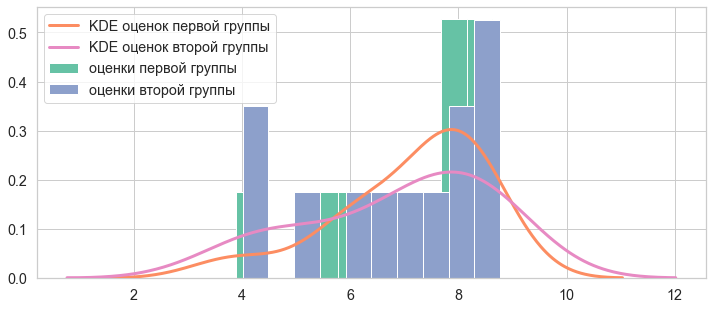

In [74]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.hist(X_1, label='оценки первой группы', density=True)
ax.plot(kde_1.support, kde_1.density, lw=3, label="KDE оценок первой группы", zorder=10)
ax.hist(X_2, label='оценки второй группы', density=True)
ax.plot(kde_2.support, kde_2.density, lw=3, label="KDE оценок второй группы", zorder=10)
ax.legend(loc="best")
ax.grid(True, zorder=-5)
plt.show()

Распределения довольно похожи, так что может быть, что средние действительно сильно не отличаются. 

In [70]:
len(X_1), len(X_2)

(12, 12)

Внезапно размеры выборок оказались одинаковы. Это значит, что мы опять можем проверить гипотезу о независимости выборок.

In [71]:
pval = sps.pearsonr(X_1, X_2)[1]
print(f'p-value критерия о независимости выборок: {pval}')
print(f'отвергается ли гипотеза о независимости: {pval < 0.05}')

p-value критерия о независимости выборок: 0.8712848870819596
отвергается ли гипотеза о независимости: False


Гипотеза о независимости не отверглась, да и идейно понятно, что люди с разных групп, скорее всего, немного независимо учатся друг от друга, поэтому будем применять критерий для независимых выборок.

In [72]:
ttest_pval = sps.ttest_ind(X_1, X_2)[1]
print(f'p-value критерия о равенстве средних оценок: {ttest_pval}')
print(f'отвергается ли гипотеза о равентсве: {ttest_pval < 0.05}')

p-value критерия о равенстве средних оценок: 0.7201235591301156
отвергается ли гипотеза о равентсве: False


**Вывод:** гипотеза о равенстве средних оценок не отвергается, к тому же по гистограмме видно, что распределения близки, из чего можно сделать вывод, что средние действительно могут быть одинаковы.

### Задача 3

Пусть $X=(X_1, ..., X_n)$ и $Y=(Y_1, ..., Y_n)$ — независимые выборки *одинакового* размера. Выведите сходимость статистики относительного t-test'а с помощью дельта-метода.

### Задача 4

Пусть $X=(X_1, ..., X_n)$ и $Y=(Y_1, ..., Y_m)$ — нормальные выборки с одинаковой неизвестной дисперсией, возможно, *разного* размера. Докажите что статистика абсолютного t-test'а имеет распределение Стьюдента с $n-m-2$ степенями свободы.

*Указание.* Воспользуйтесь теоремой об ортогональном разложении гауссовского вектора.

### Задача 5

Напишите функцию, реализующую относительный t-test. Функция должна возвращать значение статистики, доверительный интервал, p-value.

Тогда лекции критерий относительного t-теста: $$T = \left\{\left|\sqrt{n}\frac{R}{\widehat{\sigma_R}}\right| \geq z_{1 - \alpha / 2}\right\},$$ где $$R = \frac{\overline{X} - \overline{Y}}{\overline{Y}}, \\ \widehat{\sigma^2_R} = \frac{\widehat{\sigma_1^2}}{\widehat{a_2}^2} + \frac{\widehat{a_1}^2}{\widehat{a_2}^4}\widehat{\sigma_2^2} = \frac{S_X^2}{(\overline{Y})^2} + \frac{(\overline{X})^2}{(\overline{Y})^4}S_Y^2.$$ 
Тогда p-value будет: $$P\left(\left|\sqrt{n}\frac{R}{\widehat{\sigma_R}}\right| \geq t\right),$$ где $t$ &mdash; значение статистики.

Доверительный интервал для $\theta = a_1 - a_2$ будет: $$\left(\overline{X} - \overline{Y} \pm \frac{z_{1 - \alpha / 2}\sqrt{S_X^2 + \frac{(\overline{X})^2}{(\overline{Y})^2}S_Y^2}}{\sqrt{n}}\right).$$

Также заметим, что у нас возникают проблемы, если средние будут близки к нулю. Это значит, что когда средние близки к нулю, мы можем их сдвинуть, чтобы не возникало этой проблемы.

In [482]:
def ttest_rel_ind(X, Y, alpha=0.05):
    EPS = 1e-1
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    if np.abs(mean_X) < EPS or np.abs(mean_Y) < EPS: # сдвигаем средние, если они близки к нулю
        if mean_X > 0:
            mean_X += EPS
            mean_Y += EPS
        else:
            mean_X -= EPS
            mean_Y -= EPS
    var_X = np.var(X)
    var_Y = np.var(Y)
    n = np.minimum(X.shape[0], Y.shape[0])
    mod_R = np.abs((mean_X - mean_Y) / mean_Y)
    sigma_R = np.sqrt(var_X / (mean_Y ** 2) + var_Y * (mean_X ** 2) / (mean_Y ** 4))
    t = np.sqrt(n) * mod_R / sigma_R
    resid = sps.norm.ppf(1 - alpha / 2) * np.sqrt(var_X + (mean_X ** 2) / (mean_Y ** 2) * var_Y) / np.sqrt(n)
    left_bound = mean_X - mean_Y - resid
    right_bound = mean_X - mean_Y + resid
    pval = 2 * sps.norm.sf(t)
    return t, (left_bound, right_bound), pval

Проверим, что выдает наш критерий на примере с задачи 2.

In [483]:
ttest_rel_ind(X_1, X_2)

(0.3716851818679078,
 (-0.9721491338234911, 1.4271491338234912),
 0.7101272590176408)

Получилось очень похожее значение p-value. Это дает нам право надеяться, что критерий работает.

Проверьте корректность критерия методом AA-тестирования на искусственных данных. Рассмотрите разные виды распределений и разный размер выборки. Представьте полученные результаты в удобном для читателя виде.

Проверим на 4 примерах: стандартное нормальное, стандартный Лапласс, стандартный Коши и Бернулли с вероятностью успеха 0.5. Зафиксируем число итераций и уровень значимости.

In [500]:
n_iter = 50000  # количество итераций в одном эксперименте
alpha = 0.05  # уровень значимости

Пусть $n = 10000.$

In [511]:
size = 10000  # размер выборки
n_errors = 0  # количество отвержений H_0

for _ in tqdm(range(n_iter)):
    x, y = sps.norm.rvs(size=(2, size))
    n_errors += ttest_rel_ind(x, y)[2] < alpha

print('{:.4f} +/- {:.4f}'.format(n_errors / n_iter,
                                 2 * np.sqrt(alpha / n_iter)))

100%|██████████| 2500/2500 [00:01<00:00, 1320.46it/s]

0.0140 +/- 0.0089


In [502]:
size = 10000  # размер выборки
n_errors = 0  # количество отвержений H_0

for _ in tqdm(range(n_iter)):
    x, y = sps.laplace.rvs(size=(2, size))
    n_errors += ttest_rel_ind(x, y)[2] < alpha
    
print('{:.4f} +/- {:.4f}'.format(n_errors / n_iter,
                                 2 * np.sqrt(alpha / n_iter)))

100%|██████████| 50000/50000 [00:38<00:00, 1303.93it/s]

0.0068 +/- 0.0020


In [503]:
size = 10000  # размер выборки
n_errors = 0  # количество отвержений H_0

for _ in tqdm(range(n_iter)):
    x, y = sps.cauchy.rvs(size=(2, size))
    n_errors += ttest_rel_ind(x, y)[2] < alpha
    
print('{:.4f} +/- {:.4f}'.format(n_errors / n_iter,
                                 2 * np.sqrt(alpha / n_iter)))

100%|██████████| 50000/50000 [00:36<00:00, 1355.93it/s]

0.2358 +/- 0.0020


In [504]:
size = 10000  # размер выборки
n_errors = 0  # количество отвержений H_0

for _ in tqdm(range(n_iter)):
    x, y = sps.bernoulli(0.5).rvs(size=(2, size))
    n_errors += ttest_rel_ind(x, y)[2] < alpha
    
print('{:.4f} +/- {:.4f}'.format(n_errors / n_iter,
                                 2 * np.sqrt(alpha / n_iter)))

100%|██████████| 50000/50000 [01:06<00:00, 757.05it/s]

0.0492 +/- 0.0020


Теперь пусть $n = 100.$

In [505]:
size = 100  # размер выборки
n_errors = 0  # количество отвержений H_0

for _ in tqdm(range(n_iter)):
    x, y = sps.norm.rvs(size=(2, size))
    n_errors += ttest_rel_ind(x, y)[2] < alpha
    
print('{:.4f} +/- {:.4f}'.format(n_errors / n_iter,
                                 2 * np.sqrt(alpha / n_iter)))

100%|██████████| 50000/50000 [00:15<00:00, 3147.29it/s]

0.0369 +/- 0.0020


In [506]:
size = 100  # размер выборки
n_errors = 0  # количество отвержений H_0

for _ in tqdm(range(n_iter)):
    x, y = sps.laplace.rvs(size=(2, size))
    n_errors += ttest_rel_ind(x, y)[2] < alpha
    
print('{:.4f} +/- {:.4f}'.format(n_errors / n_iter,
                                 2 * np.sqrt(alpha / n_iter)))

100%|██████████| 50000/50000 [00:16<00:00, 3030.32it/s]

0.0547 +/- 0.0020


In [507]:
size = 100  # размер выборки
n_errors = 0  # количество отвержений H_0

for _ in tqdm(range(n_iter)):
    x, y = sps.cauchy.rvs(size=(2, size))
    n_errors += ttest_rel_ind(x, y)[2] < alpha
    
print('{:.4f} +/- {:.4f}'.format(n_errors / n_iter,
                                 2 * np.sqrt(alpha / n_iter)))

100%|██████████| 50000/50000 [00:16<00:00, 3041.13it/s]

0.2423 +/- 0.0020


In [508]:
size = 100  # размер выборки
n_errors = 0  # количество отвержений H_0

for _ in tqdm(range(n_iter)):
    x, y = sps.bernoulli(0.5).rvs(size=(2, size))
    n_errors += ttest_rel_ind(x, y)[2] < alpha
    
print('{:.4f} +/- {:.4f}'.format(n_errors / n_iter,
                                 2 * np.sqrt(alpha / n_iter)))

100%|██████████| 50000/50000 [00:46<00:00, 1074.50it/s]

0.0470 +/- 0.0020


Проблема возникла только с распределением Коши. Это можно объяснить следующим образом: у распределения Коши нет первого и второго момента, поэтому мы не можем применить, например, ЦПТ, чтобы доказать асимптотическую нормальность, откуда и берется критерий. Это еще раз доказывает, что для использования t-теста требуется наличие конечного 2-го момента.

Зафиксируйте тип распределения и размер выборки. Исследуйте мощность критерия помощью добавления смещения к одной из выборок.

Будем сравнивать 2 нормальных распределения.

In [512]:
size = 10000
n_iter = 2500
a_grid = np.linspace(-1, 1, 101)

n_errors = np.zeros_like(a_grid) 

for i, a in tqdm(enumerate(a_grid)):
    for _ in range(n_iter):
        x = sps.norm(loc=a).rvs(size=size)
        y = sps.norm.rvs(size=size)
        n_errors[i] += ttest_rel_ind(x, y)[2] < alpha

101it [06:03,  3.60s/it]


No handles with labels found to put in legend.


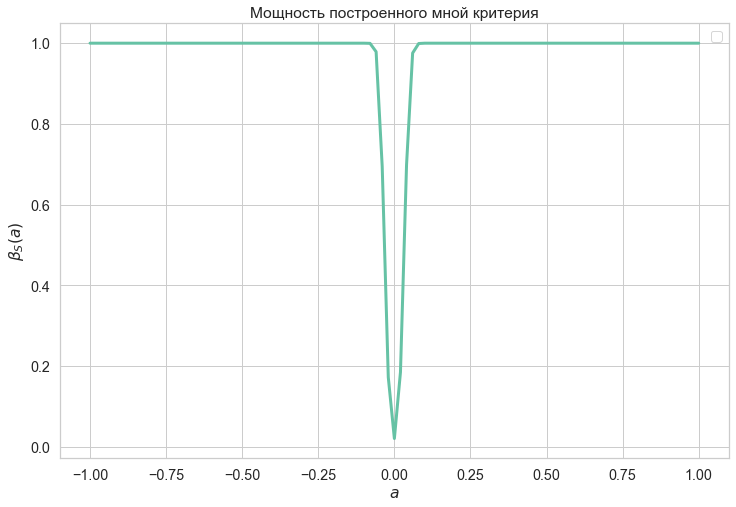

In [513]:
plt.figure(figsize=(12, 8))
plt.plot(a_grid, n_errors / n_iter, lw=3)
plt.xlabel('$a$')
plt.ylabel('$\\beta_{S}(a)$')
plt.title("Мощность построенного мной критерия")
plt.legend()
plt.show()

Сделайте выводы.

График мощности получился очень многообещающий: даже при довольно небольших неравенствах средних у критерия мощность уже близка к 1, что, правда, может говорить о том, что статистическая значимость есть, а практической нет.

### Задача 6

Рассмотрим данные по транзакциям одного из интернет-магазинов: https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo

Скачайте данные и оставьте колонки:
* `Quantity` &mdash; количество данной единицы товара в чеке.
* `InvoiceDate` &mdash; дата и время покупки.
* `UnitPrice` &mdash; цена одной единицы товара.
* `CustomerID` &mdash; уникальный идентификатор клиента.

In [514]:
%%time
data = pd.read_excel('archive (3)/Online Retail.xlsx')

Wall time: 1min 1s


In [515]:
data = data[['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']]
data

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-12-01 08:26:00,2.55,17850.0
1,6,2010-12-01 08:26:00,3.39,17850.0
2,8,2010-12-01 08:26:00,2.75,17850.0
3,6,2010-12-01 08:26:00,3.39,17850.0
4,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,12680.0
541905,6,2011-12-09 12:50:00,2.10,12680.0
541906,4,2011-12-09 12:50:00,4.15,12680.0
541907,4,2011-12-09 12:50:00,4.15,12680.0


In [516]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     541909 non-null  int64         
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   UnitPrice    541909 non-null  float64       
 3   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 16.5 MB


Магазин хочет провести AB-тест для оценки значимости эффекта от нового блока умных рекомендаций и использовать для этого относительный t-test. Ожидается, что новый блок рекомендаций увеличит общую выручку. На время тестирования решено выкатить блок рекомендаций на случайную группу из 300 пользователей.

**1.**
На искусственных данных мы уже проверили наш тест, теперь пора проверить на реальных. На данных за апрель и май проведите множество случайных AA-тестов для определения реального уровня значимости, выбирая случайных пользователей в каждую из групп. Использовать нужно группы одинакого размера, конечно же, они не должны пересекаться. Для каждого пользователя рассматриваем общую сумму его покупок за два месяца.

Выделим данные за апрель и май.

In [517]:
data_april_may = data[data['InvoiceDate'] < pd.Timestamp('2011-01-06 00:00:00')]
data_april_may = data_april_may[data_april_may['InvoiceDate'] > pd.Timestamp('2011-01-04 00:00:00')]
data_april_may = data_april_may.dropna()
data_april_may

,Quantity,InvoiceDate,UnitPrice,CustomerID
42481,10,2011-01-04 10:00:00,1.95,13313.0
42482,25,2011-01-04 10:00:00,0.42,13313.0
42483,25,2011-01-04 10:00:00,0.42,13313.0
42484,5,2011-01-04 10:00:00,2.10,13313.0
42485,10,2011-01-04 10:00:00,1.25,13313.0
...,...,...,...,...
45403,4,2011-01-05 17:33:00,2.95,12748.0
45404,12,2011-01-05 17:33:00,2.95,12748.0
45405,3,2011-01-05 17:33:00,12.75,12748.0
45406,4,2011-01-05 17:33:00,9.95,12748.0


In [541]:
unique_id = pd.unique(data_april_may['CustomerID'])
len(unique_id)

94

У нас всего 94 пользователя, поэтому будем на каждой итерации сэмплировать по 40 пользователей в каждую из групп.

In [520]:
n_iter = 10000
size = 40
n_errors = 0
alpha = 0.05
pval_arr = []

for _ in tqdm(range(n_iter)):
    customers = np.random.choice(unique_id, replace=False, size=size * 2)
    customers_x = customers[:size]
    customers_y = customers[size:]
    X = np.zeros_like(customers_x)
    Y = np.zeros_like(customers_y)
    i = 0
    for cus_x, cus_y in zip(customers_x, customers_y):
        X[i] = data_april_may['Quantity'][data_april_may['CustomerID'] == cus_x].sum()
        Y[i] = data_april_may['Quantity'][data_april_may['CustomerID'] == cus_y].sum()
        i += 1
    
    pval = ttest_rel_ind(X, Y)[2]
    pval_arr.append(pval)
    n_errors += pval < alpha
    
print('{:.4f} +/- {:.4f}'.format(n_errors / n_iter,
                                 2 * np.sqrt(alpha / n_iter)))

100%|██████████| 10000/10000 [02:54<00:00, 57.20it/s]

0.0803 +/- 0.0045


Ошибка первого рода получилась чуть больше, чем ожидалось. Возможно, распределение имеет тяжелые хвосты, из-за чего выборка из 40 пользователей оказывается недостаточной для сходимости. Проверим это, построив гистограмму.

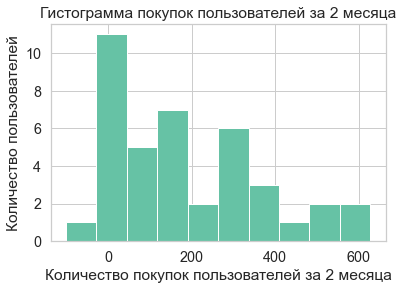

In [521]:
plt.hist(X)
plt.xlabel('Количество покупок пользователей за 2 месяца')
plt.ylabel('Количество пользователей')
plt.title("Гистограмма покупок пользователей за 2 месяца")
plt.show()

Действительно, у распределения тяжелые хвосты.

Корректно ли применять критерий на данных магазина? Постройте также гистограмму значений p-value.

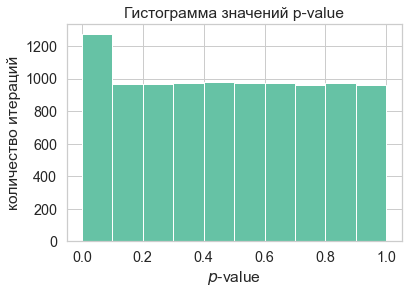

In [522]:
plt.hist(pval_arr)
plt.xlabel('$p$-value')
plt.ylabel('количество итераций')
plt.title("Гистограмма значений p-value")
plt.show()

Кажется, применять критерий на данных магазина не совсем корректно, так как, как минимум, у нас ошибка первого рода побольше требуемой. Что касается гистограммы, то она показывает, что распределение статистики одинаково и непрерывно (так как выполняется свойство p-value о равномерной распределенности статистики при верности гипотезы).

**2.** С помощью проведения AB-теста по историческим данных выясните, какова мощность теста для разных значений эффекта. Схема проведения аналогична предыдущему пункту, но к тестовой группе нужно добавить положительное смещение.

При добавлении искусственного смещения рекомендуется также добавлять небольшой шум для каждого пользователя. Поясните, для этого это может быть полезно.

In [559]:
n_iter = 500

a_arr = np.linspace(0, 200, 101)

size = 40
n_errors = np.zeros_like(a_arr)
alpha = 0.05

for j, a in tqdm(enumerate(a_arr)):
    for _ in tqdm(range(n_iter)):
        customers = np.random.choice(unique_id, replace=False, size=size * 2)
        customers_x = customers[:size]
        customers_y = customers[size:]
        X = np.zeros_like(customers_x)
        Y = np.zeros_like(customers_y)
        i = 0
        for cus_x, cus_y in zip(customers_x, customers_y):
            X[i] = data_april_may['Quantity'][data_april_may['CustomerID'] == cus_x].sum()
            Y[i] = data_april_may['Quantity'][data_april_may['CustomerID'] == cus_y].sum()
            i += 1

        X += sps.norm(scale=10).rvs(size)
        X += a
        Y += sps.norm(scale=10).rvs(size)
        
        n_errors[j] += ttest_rel_ind(X, Y)[2] < alpha

0it [00:00, ?it/s]
100%|██████████| 500/500 [00:09<00:00, 51.53it/s]
1it [00:09,  9.71s/it]
100%|██████████| 500/500 [00:09<00:00, 50.74it/s]
2it [00:19,  9.79s/it]
100%|██████████| 500/500 [00:09<00:00, 51.16it/s]
3it [00:29,  9.79s/it]
 61%|██████    | 303/500 [00:05<00:03, 51.63it/s]


100%|██████████| 500/500 [00:09<00:00, 51.66it/s]
4it [00:39,  9.75s/it]
100%|██████████| 500/500 [00:09<00:00, 51.96it/s]
5it [00:48,  9.70s/it]
100%|██████████| 500/500 [00:09<00:00, 52.15it/s]
6it [00:58,  9.66s/it]
100%|██████████| 500/500 [00:09<00:00, 52.03it/s]
7it [01:07,  9.65s/it]
 28%|██▊       | 138/500 [00:02<00:06, 51.97it/s]


100%|██████████| 500/500 [00:09<00:00, 52.19it/s]
8it [01:17,  9.63s/it]
100%|██████████| 500/500 [00:09<00:00, 51.95it/s]
9it [01:27,  9.63s/it]
100%|██████████| 500/500 [00:09<00:00, 51.94it/s]
10it [01:36,  9.63s/it]
 95%|█████████▍| 474/500 [00:09<00:00, 52.37it/s]


100%|██████████| 500/500 [00:09<00:00, 52.23it/s]
11it [01:46,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 51.98it/s]
12it [01:55,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 52.17it/s]
13it [02:05,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 51.93it/s]
14it [02:15,  9.61s/it]
 61%|██████    | 306/500 [00:05<00:03, 52.49it/s]


100%|██████████| 500/500 [00:09<00:00, 52.02it/s]
15it [02:24,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 52.17it/s]
16it [02:34,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 52.09it/s]
17it [02:43,  9.60s/it]
100%|██████████| 500/500 [00:09<00:00, 52.24it/s]
18it [02:53,  9.60s/it]
 28%|██▊       | 138/500 [00:02<00:06, 52.13it/s]


100%|██████████| 500/500 [00:09<00:00, 51.91it/s]
19it [03:03,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 51.53it/s]
20it [03:12,  9.64s/it]
100%|██████████| 500/500 [00:09<00:00, 51.60it/s]
21it [03:22,  9.65s/it]
 94%|█████████▍| 470/500 [00:09<00:00, 51.90it/s]


100%|██████████| 500/500 [00:09<00:00, 51.62it/s]
22it [03:32,  9.66s/it]
100%|██████████| 500/500 [00:09<00:00, 52.26it/s]
23it [03:41,  9.64s/it]
100%|██████████| 500/500 [00:09<00:00, 52.13it/s]
24it [03:51,  9.62s/it]
100%|██████████| 500/500 [00:09<00:00, 52.10it/s]
25it [04:00,  9.62s/it]
 60%|██████    | 300/500 [00:05<00:03, 52.32it/s]


100%|██████████| 500/500 [00:09<00:00, 52.22it/s]
26it [04:10,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 52.28it/s]
27it [04:20,  9.59s/it]
100%|██████████| 500/500 [00:09<00:00, 52.31it/s]
28it [04:29,  9.58s/it]
100%|██████████| 500/500 [00:09<00:00, 52.25it/s]
29it [04:39,  9.58s/it]
 26%|██▋       | 132/500 [00:02<00:07, 52.19it/s]


100%|██████████| 500/500 [00:09<00:00, 52.10it/s]
30it [04:48,  9.59s/it]
100%|██████████| 500/500 [00:09<00:00, 52.25it/s]
31it [04:58,  9.58s/it]
100%|██████████| 500/500 [00:09<00:00, 52.00it/s]
32it [05:08,  9.59s/it]
 94%|█████████▎| 468/500 [00:09<00:00, 52.38it/s]


100%|██████████| 500/500 [00:09<00:00, 51.85it/s]
33it [05:17,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 51.52it/s]
34it [05:27,  9.64s/it]
100%|██████████| 500/500 [00:09<00:00, 51.92it/s]
35it [05:37,  9.64s/it]
100%|██████████| 500/500 [00:09<00:00, 52.13it/s]
36it [05:46,  9.62s/it]
 60%|██████    | 300/500 [00:05<00:03, 52.21it/s]


100%|██████████| 500/500 [00:09<00:00, 51.51it/s]
37it [05:56,  9.65s/it]
100%|██████████| 500/500 [00:09<00:00, 52.02it/s]
38it [06:05,  9.64s/it]
100%|██████████| 500/500 [00:09<00:00, 51.83it/s]
39it [06:15,  9.64s/it]
100%|██████████| 500/500 [00:09<00:00, 52.01it/s]
40it [06:25,  9.63s/it]
 26%|██▋       | 132/500 [00:02<00:07, 52.45it/s]


100%|██████████| 500/500 [00:09<00:00, 52.26it/s]
41it [06:34,  9.62s/it]
100%|██████████| 500/500 [00:09<00:00, 52.18it/s]
42it [06:44,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 51.20it/s]
43it [06:54,  9.65s/it]
 93%|█████████▎| 466/500 [00:09<00:00, 52.20it/s]


100%|██████████| 500/500 [00:09<00:00, 51.34it/s]
44it [07:03,  9.68s/it]
100%|██████████| 500/500 [00:09<00:00, 52.08it/s]
45it [07:13,  9.66s/it]
100%|██████████| 500/500 [00:09<00:00, 52.24it/s]
46it [07:23,  9.63s/it]
100%|██████████| 500/500 [00:09<00:00, 52.09it/s]
47it [07:32,  9.62s/it]
 60%|██████    | 300/500 [00:05<00:03, 52.32it/s]


100%|██████████| 500/500 [00:09<00:00, 52.24it/s]
48it [07:42,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 51.92it/s]
49it [07:51,  9.62s/it]
100%|██████████| 500/500 [00:09<00:00, 52.15it/s]
50it [08:01,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 52.24it/s]
51it [08:11,  9.60s/it]
 26%|██▋       | 132/500 [00:02<00:07, 51.96it/s]


100%|██████████| 500/500 [00:09<00:00, 52.00it/s]
52it [08:20,  9.60s/it]
100%|██████████| 500/500 [00:09<00:00, 52.23it/s]
53it [08:30,  9.60s/it]
100%|██████████| 500/500 [00:09<00:00, 51.57it/s]
54it [08:39,  9.63s/it]
 94%|█████████▎| 468/500 [00:09<00:00, 52.30it/s]


100%|██████████| 500/500 [00:09<00:00, 51.87it/s]
55it [08:49,  9.63s/it]
100%|██████████| 500/500 [00:09<00:00, 51.73it/s]
56it [08:59,  9.64s/it]
100%|██████████| 500/500 [00:09<00:00, 51.70it/s]
57it [09:08,  9.65s/it]
100%|██████████| 500/500 [00:09<00:00, 52.07it/s]
58it [09:18,  9.64s/it]
 59%|█████▉    | 296/500 [00:05<00:03, 52.25it/s]


100%|██████████| 500/500 [00:09<00:00, 52.05it/s]
59it [09:28,  9.63s/it]
100%|██████████| 500/500 [00:09<00:00, 51.75it/s]
60it [09:37,  9.64s/it]
100%|██████████| 500/500 [00:09<00:00, 52.21it/s]
61it [09:47,  9.62s/it]
100%|██████████| 500/500 [00:09<00:00, 51.89it/s]
62it [09:56,  9.63s/it]
 25%|██▌       | 126/500 [00:02<00:07, 51.88it/s]


100%|██████████| 500/500 [00:09<00:00, 51.82it/s]
63it [10:06,  9.63s/it]
100%|██████████| 500/500 [00:09<00:00, 51.06it/s]
64it [10:16,  9.68s/it]
100%|██████████| 500/500 [00:09<00:00, 51.02it/s]
65it [10:26,  9.72s/it]
 90%|█████████ | 450/500 [00:08<00:00, 52.37it/s]


100%|██████████| 500/500 [00:09<00:00, 52.13it/s]
66it [10:35,  9.68s/it]
100%|██████████| 500/500 [00:09<00:00, 52.05it/s]
67it [10:45,  9.66s/it]
100%|██████████| 500/500 [00:09<00:00, 52.05it/s]
68it [10:55,  9.64s/it]
100%|██████████| 500/500 [00:09<00:00, 52.03it/s]
69it [11:04,  9.64s/it]
 56%|█████▋    | 282/500 [00:05<00:04, 52.23it/s]


100%|██████████| 500/500 [00:09<00:00, 51.97it/s]
70it [11:14,  9.63s/it]
100%|██████████| 500/500 [00:09<00:00, 52.21it/s]
71it [11:23,  9.62s/it]
100%|██████████| 500/500 [00:09<00:00, 51.97it/s]
72it [11:33,  9.62s/it]
100%|██████████| 500/500 [00:09<00:00, 52.01it/s]
73it [11:43,  9.62s/it]
 23%|██▎       | 114/500 [00:02<00:07, 52.36it/s]


100%|██████████| 500/500 [00:09<00:00, 52.16it/s]
74it [11:52,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 52.03it/s]
75it [12:02,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 52.21it/s]
76it [12:11,  9.60s/it]
 90%|█████████ | 450/500 [00:08<00:00, 52.16it/s]


100%|██████████| 500/500 [00:09<00:00, 51.91it/s]
77it [12:21,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 51.46it/s]
78it [12:31,  9.64s/it]
100%|██████████| 500/500 [00:09<00:00, 51.34it/s]
79it [12:40,  9.67s/it]
100%|██████████| 500/500 [00:09<00:00, 50.90it/s]
80it [12:50,  9.72s/it]
 54%|█████▍    | 270/500 [00:05<00:04, 51.86it/s]


100%|██████████| 500/500 [00:09<00:00, 51.79it/s]
81it [13:00,  9.70s/it]
100%|██████████| 500/500 [00:09<00:00, 51.30it/s]
82it [13:10,  9.72s/it]
100%|██████████| 500/500 [00:09<00:00, 52.09it/s]
83it [13:19,  9.68s/it]
100%|██████████| 500/500 [00:09<00:00, 52.29it/s]
84it [13:29,  9.65s/it]
 19%|█▉        | 96/500 [00:01<00:07, 52.13it/s]


100%|██████████| 500/500 [00:09<00:00, 52.06it/s]
85it [13:38,  9.63s/it]
100%|██████████| 500/500 [00:09<00:00, 52.32it/s]
86it [13:48,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 52.10it/s]
87it [13:58,  9.61s/it]
 86%|████████▋ | 432/500 [00:08<00:01, 51.51it/s]


100%|██████████| 500/500 [00:09<00:00, 52.02it/s]
88it [14:07,  9.61s/it]
100%|██████████| 500/500 [00:09<00:00, 52.20it/s]
89it [14:17,  9.60s/it]
100%|██████████| 500/500 [00:09<00:00, 52.19it/s]
90it [14:26,  9.60s/it]
100%|██████████| 500/500 [00:09<00:00, 51.78it/s]
91it [14:36,  9.62s/it]
 53%|█████▎    | 264/500 [00:05<00:04, 52.19it/s]


100%|██████████| 500/500 [00:09<00:00, 51.84it/s]
92it [14:46,  9.63s/it]
100%|██████████| 500/500 [00:09<00:00, 52.05it/s]
93it [14:55,  9.62s/it]
100%|██████████| 500/500 [00:09<00:00, 51.46it/s]
94it [15:05,  9.65s/it]
100%|██████████| 500/500 [00:09<00:00, 50.96it/s]
95it [15:15,  9.70s/it]
 18%|█▊        | 90/500 [00:01<00:07, 51.84it/s]


100%|██████████| 500/500 [00:09<00:00, 52.00it/s]
96it [15:25,  9.68s/it]
100%|██████████| 500/500 [00:09<00:00, 52.07it/s]
97it [15:34,  9.65s/it]
100%|██████████| 500/500 [00:09<00:00, 52.07it/s]
98it [15:44,  9.64s/it]
 85%|████████▌ | 426/500 [00:08<00:01, 52.16it/s]


100%|██████████| 500/500 [00:09<00:00, 52.19it/s]
99it [15:53,  9.62s/it]
100%|██████████| 500/500 [00:09<00:00, 52.01it/s]
100it [16:03,  9.62s/it]
100%|██████████| 500/500 [00:09<00:00, 51.43it/s]
101it [16:13,  9.64s/it]


In [560]:
n_errors

array([ 40.,  40.,  42.,  33.,  44.,  35.,  39.,  36.,  23.,  24.,  36.,
        23.,  29.,  27.,  22.,  35.,  21.,  22.,  28.,  38.,  26.,  25.,
        30.,  25.,  38.,  22.,  32.,  34.,  32.,  30.,  22.,  38.,  35.,
        38.,  38.,  34.,  35.,  42.,  42.,  35.,  35.,  50.,  56.,  31.,
        47.,  50.,  49.,  56.,  62.,  58.,  62.,  58.,  77.,  65.,  76.,
        69.,  73.,  67.,  70.,  69.,  80.,  91.,  75.,  92.,  80.,  99.,
        88.,  97., 104.,  95.,  99., 110., 103., 120., 120., 131., 144.,
       134., 120., 143., 136., 151., 136., 153., 181., 167., 153., 139.,
       183., 167., 179., 198., 175., 184., 207., 195., 191., 190., 202.,
       205., 220.])

No handles with labels found to put in legend.


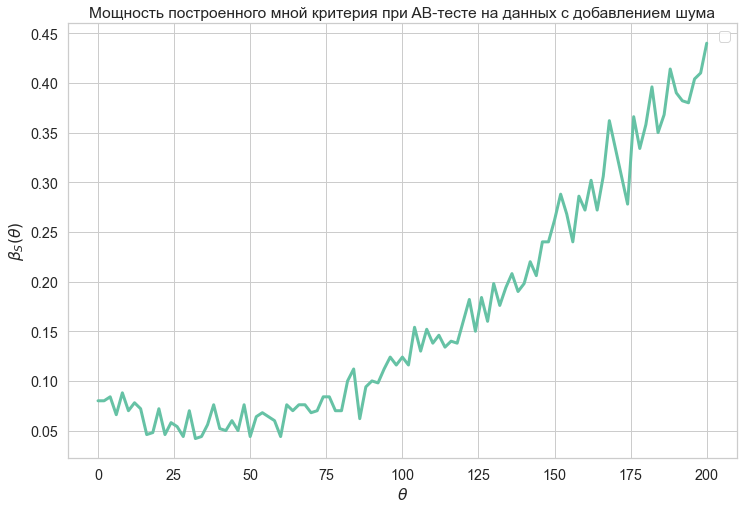

In [561]:
plt.figure(figsize=(12, 8))
plt.plot(a_arr, n_errors / n_iter, lw=3)
plt.xlabel('$\\theta$')
plt.ylabel('$\\beta_{S}(\\theta)$')
plt.title("Мощность построенного мной критерия при AB-тесте на данных с добавлением шума")
plt.legend()
plt.show()

Сделайте выводы.

**Вывод:** как видно, на реальных данных модель сработала довольно плохо, так как, видимо, распределение данных было с большим количеством выбросов. Хотя мощность потихоньку увеличивается, но недостаточно сильно, как мне кажется. Возможно, стоило попробовать как-то попреобразовывать данные (пролагарифмировать, или использовать преобразование Бокса-Кокса), но уж слишком много времени я и так потратил на исправления того, что я неправильно понял, да и машинка огромная, так что я в теории все сделать не успеваю.